In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import optimize
from scipy.stats import chi2
import pandas as pd
import os.path as path
import urllib.request

# Punto 7

In [2]:
# Datos

file = 'Sigmoid.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists( file ):
    Path_ = urllib.request.urlretrieve( url , file )
    print( 'File loaded' )
else:
    Path_ = file
    

In [3]:

Data = pd.read_csv(Path_,sep=',')

X = np.float64( Data['x'] )
Y = np.float64( Data['y'] )
N = Y.size
h = 0.01


### a)

In [4]:
# Modelo de ajuste

def Sigmoide(x,P0,P1,P2):
    Sigmoide = (P0) / ( P1 + np.exp( -P2 * x ) )
    return Sigmoide


### b)

In [5]:
# Función de costo a minimizar

def Funcion_de_costo(X, Y, a, b, c):
    ChiSquared = 0
    for i in range(N):
        ChiSquared += (Y[i] - Sigmoide(X[i],a,b,c))**2
    return ChiSquared


### c)

In [6]:

def Costo_gradiente(x, y, a, b, c):
    grad = np.zeros(3)
    grad[0] = (Funcion_de_costo(X,Y,a+h,b,c) - Funcion_de_costo(X,Y,a-h,b,c)) / (2*h)
    grad[1] = (Funcion_de_costo(X,Y,a,b+h,c) - Funcion_de_costo(X,Y,a,b-h,c)) / (2*h)
    grad[2] = (Funcion_de_costo(X,Y,a,b,c+h) - Funcion_de_costo(X,Y,a,b,c-h)) / (2*h)
    return grad


### d)

In [7]:

def Gradiente_descendiente(punto,lr,itmax,error):
    
    iteracion = 0
    distancia_al_optimo = 1
    
    while distancia_al_optimo > float(error) and iteracion < int(itmax):
            x_grad = Costo_gradiente(X,Y, punto[0], punto[1], punto[2])
            punto = punto - lr*x_grad
            distancia_al_optimo = np.linalg.norm( punto - optimize.curve_fit(Sigmoide,X,Y)[0] )
            iteracion += 1
            if itmax%iteracion == 2000:
                print(f'Iteración: {iteracion} / {int(itmax)}')
                
    return punto, distancia_al_optimo,iteracion


### e)

In [8]:

Punto_0 = np.array([1,1,1])

parametros = Gradiente_descendiente(Punto_0,5e-4,2e4,1e-2)

P0 = parametros[0][0]
P1 = parametros[0][1]
P2 = parametros[0][2]

ChiSquared = Funcion_de_costo(X,Y,P0,P1,P2)


Iteración: 2250 / 20000
Iteración: 3000 / 20000
Iteración: 3600 / 20000
Iteración: 4500 / 20000
Iteración: 6000 / 20000
Iteración: 9000 / 20000
Iteración: 18000 / 20000


In [9]:

print(f'Los parámetros θ_0, θ_1 y θ_2 que mejor se ajusten a los datos del sigmoide generado por el raw son:')
print(f' θ_0 = {P0} // θ_1 = {P1} // θ_2 = {P2}')

print(f'Valor para χ^2 de: {ChiSquared}')

print(f'Error absoluto de parada (ϵ): {parametros[1]}')

print(f'Número de iteraciones totales: {parametros[2]}')


Los parámetros θ_0, θ_1 y θ_2 que mejor se ajusten a los datos del sigmoide generado por el raw son:
 θ_0 = 4.394141971870481 // θ_1 = 0.9737879524137685 // θ_2 = 2.789338222493078
Valor para χ^2 de: 0.10503710593049193
Error absoluto de parada (ϵ): 0.009993016256835128
Número de iteraciones totales: 19946


### f)

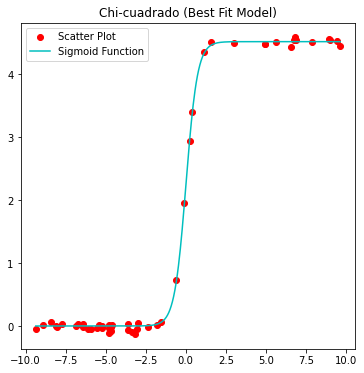

In [10]:
# Grafica

x = np.linspace(min(X),max(X),500)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X,Y,c='r',label='Scatter Plot')
plt.plot(x,Sigmoide(x,P0,P1,P2),c='c',label='Sigmoid Function')
plt.legend()
plt.title('Chi-cuadrado (Best Fit Model)')
plt.show()
